# Creating Dataset from Google Images

we will create our own dataset using images from google by getting URLs from all the search result and making them our dataset
by downloading them and put them into folders describing each category

## Imports

In [42]:
from fastai.vision import *



## Getting a list of URLs

we can get all the images URLs by hitting "CTRL + Shift + J" and running this command into the console:

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

then you can save the file as .txt and you're all set

## Creating directories

For each class in our classifier we'll create a directory and then a file that contain a list of URLs

In [6]:
folder = 'black'
file = 'black.txt'

In [11]:
folder = 'teddys'
file = 'teddys.txt'

In [16]:
folder = 'grizzly'
file = 'grizzly.txt'

We will run this cell one for each class

In [17]:
path = Path('C:/Users/Askar/fastai/dataset/Bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [18]:
path.ls()

[WindowsPath('C:/Users/Askar/fastai/dataset/Bears/black'),
 WindowsPath('C:/Users/Askar/fastai/dataset/Bears/black.txt'),
 WindowsPath('C:/Users/Askar/fastai/dataset/Bears/grizzly'),
 WindowsPath('C:/Users/Askar/fastai/dataset/Bears/grizzly.txt'),
 WindowsPath('C:/Users/Askar/fastai/dataset/Bears/teddys'),
 WindowsPath('C:/Users/Askar/fastai/dataset/Bears/teddys.txt')]

## Download images

In [19]:
classes = ['teddys','grizzly','black']

In [20]:
download_images(path/file, dest, max_pics=200)

In [21]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

teddys


grizzly


black


## View Data

In [22]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

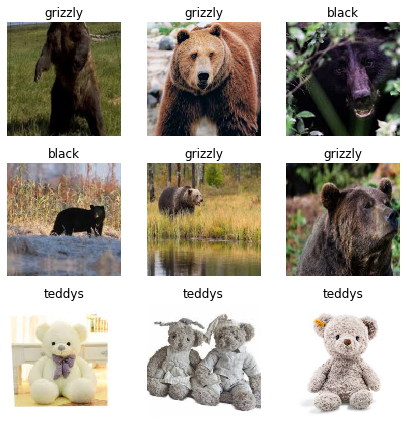

In [23]:
data.classes
data.show_batch(rows=3, figsize=(6,6))

In [24]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 381, 95)

## Training Model

In [65]:
learn = cnn_learner(data, models.resnet34, metrics= accuracy)

In [66]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.437026,0.068597,0.957895,00:21
1,0.745102,0.062756,0.968421,00:20
2,0.506562,0.055976,0.968421,00:20
3,0.374580,0.047999,0.968421,00:20


In [27]:
learn.save('stage-1')

## Tunning Learning rate

In [28]:
learn.unfreeze()

In [29]:
learn.lr_find(stop_div=False, num_it=50)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


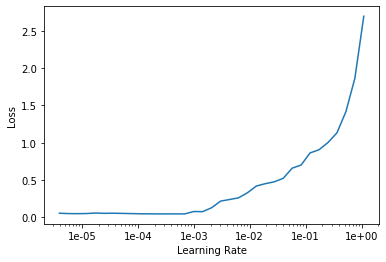

In [30]:
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.043274,0.100309,0.042105,00:21
1,0.050478,0.112523,0.031579,00:22


In [32]:
learn.save('stage-2')

## Interpretation

In [ ]:
learn.load('stage-2')

In [34]:
interp = ClassificationInterpretation.from_learner(learn)

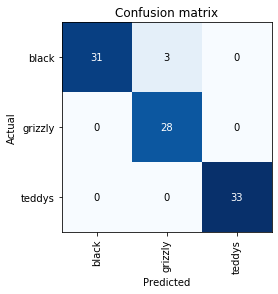

In [35]:
interp.plot_confusion_matrix()

## Putting the model into Production

In [46]:
learn.export()

In [47]:
defaults.device = torch.device('cpu')

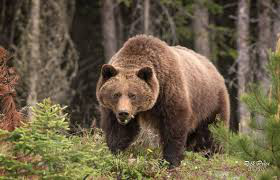

In [62]:
img = open_image(path/'grizzly'/'00000051.jpg')
img

In [63]:
learn = load_learner(path)

In [64]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class

Category grizzly